### Linear Regression for Predicting the Bay Area's Home Prices 

- Dataset: Bay Area home sales : home sold between January 2013 and  December 2015

#### Data Preprocessing:

In [288]:
#load data
import pandas as pd
data=pd.read_csv('data.csv')
data[0:1]

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0


In [289]:
#remove unecessary features 
data.drop(data.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)

In [290]:
# removed columns: 'Unnamed','info','z_address','zestimate','zipcode','zpid'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [291]:
# zindexvalue should be numeric
data.zindexvalue=data.zindexvalue.str.replace(',','')

In [292]:
data.zindexvalue=data.zindexvalue.convert_objects(convert_numeric=True)

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [293]:
#summary statistics for numeric features
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


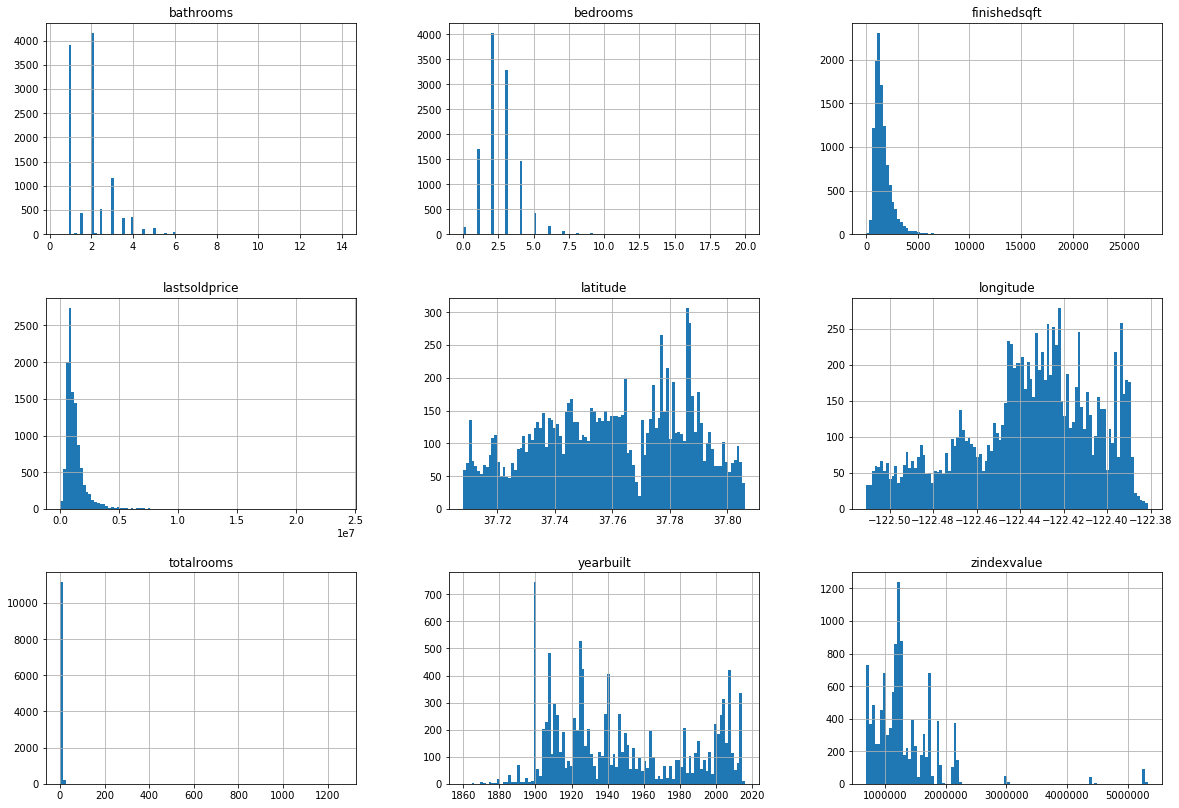

In [294]:
#numeric features distribution:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=100,figsize=(20,14))
plt.show()


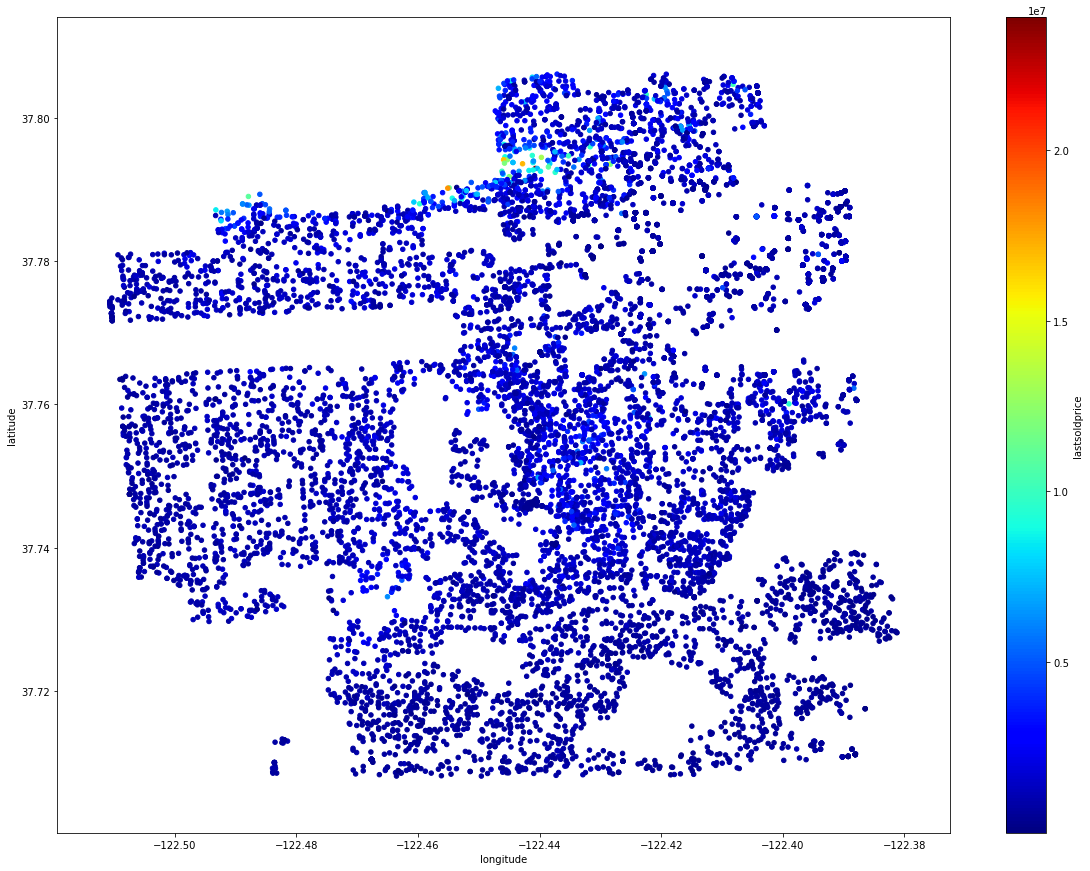

In [297]:
#color from the most expensive to the least expensive areas

data.plot(kind="scatter", x="longitude", y="latitude", alpha=1, figsize=(20,15),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [298]:
#We want to predict the variable 'lastsoldprice': 
#Correlation Between Predictors Response Varaible

corr_matrix=data.corr()
corr_matrix.lastsoldprice.sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

 - The important features for predicting last sold price are: finished square footage 'finishedsqft' and the number of bathrooms  and bedrooms and zindexvalue  
 - 'finishedsqft' is The most promising variable for predicting the last sold price.
 - Coefficient close to zero indicate there is no linear correlation for these variables 

In [299]:
import seaborn as sns
%matplotlib inline

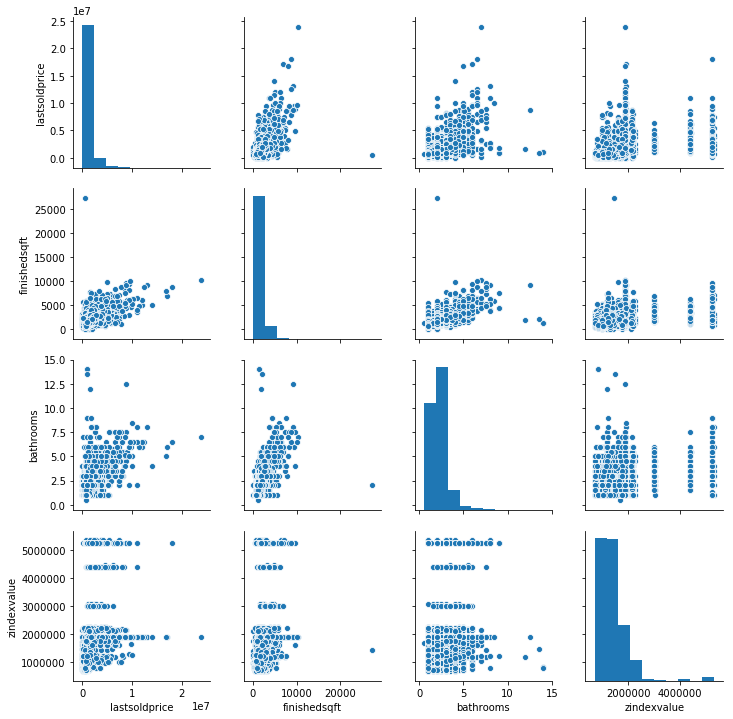

In [300]:
sns.pairplot(data[['lastsoldprice','finishedsqft','bathrooms','zindexvalue']])

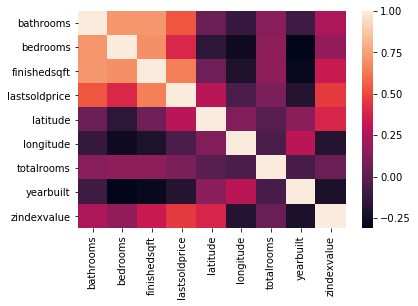

In [301]:
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [308]:
from sklearn.cross_validation import train_test_split
y1 = data.lastsoldprice
X1 =data[['finishedsqft','bathrooms','zindexvalue','bedrooms']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [309]:
#Regression Model 
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()
lm1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [310]:
pd.DataFrame(list(zip(X1_train.columns, lm1.coef_)), columns = ['features', 'est_coef'])

,features,est_coef
0,finishedsqft,565.872644
1,bathrooms,239787.339217
2,zindexvalue,0.471103
3,bedrooms,-134592.764295


In [311]:
print('Estimated intercept coefficient:', lm1.intercept_) 


Estimated intercept coefficient: -377296.964393


In [312]:
lm1.score(X1_train,y1_train)

0.50421002283201655

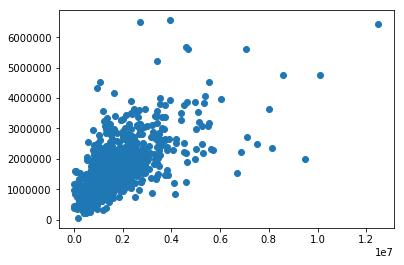

In [321]:
plt.scatter(y1_test,y1_pred)

We have got Only 50% of the explaned variance of the predictions 

In [322]:
# we have to add new variables to include them to the analysis:

# price per number of bathrooms 
data['price_per_bathrooms']=data.lastsoldprice/data.bathrooms
#price per total number of rooms 
data['price_per_totalrooms']=data.lastsoldprice/data.totalrooms
#price per total number of bedrooms 
#as there are houses with 0 bedrooms, we add 1 to adjust the calculations
data['price_per_nb_bedrooms']=data.lastsoldprice/(data.bedrooms+1)

In [323]:
cor=data.corr()
cor.lastsoldprice.sort_values(ascending=False)

lastsoldprice            1.000000
price_per_nb_bedrooms    0.806262
price_per_totalrooms     0.702388
finishedsqft             0.647208
price_per_bathrooms      0.582170
bathrooms                0.536880
zindexvalue              0.460429
bedrooms                 0.395478
latitude                 0.283107
totalrooms               0.093527
longitude               -0.052595
yearbuilt               -0.189055
Name: lastsoldprice, dtype: float64

In [324]:
data['bedrooms'].describe()

count    11330.000000
mean         2.614475
std          1.299457
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bedrooms, dtype: float64

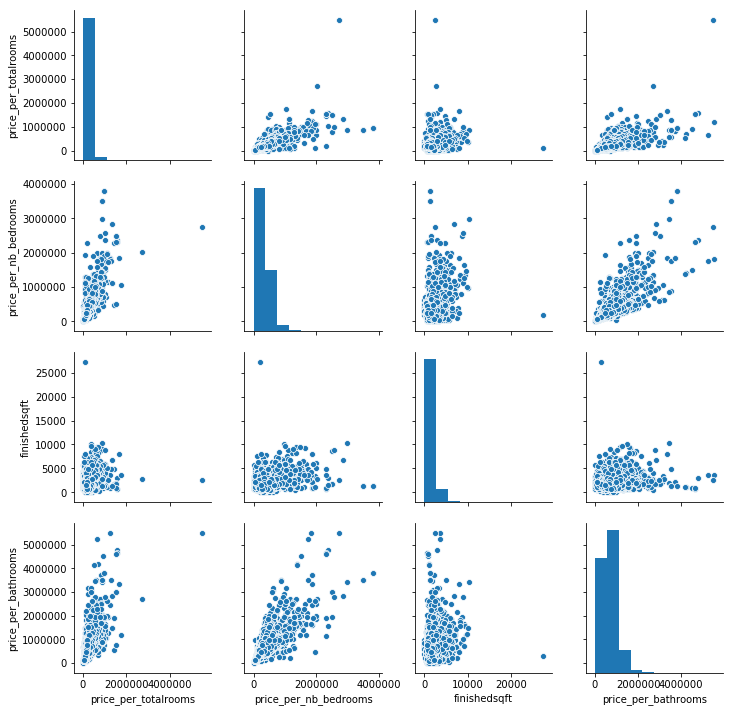

In [325]:
sns.pairplot(data[['price_per_totalrooms','price_per_nb_bedrooms','finishedsqft','price_per_bathrooms']])

The new 'price_per_bathrooms', 'price_per_nb_bedrooms' and 'price_per_totalrooms'  variables show a very strong positive correlation with the last sold price. 

The correlations are very strong and the points are not too dispersed.

We can use this variables as explanatory variables to increase the performance of the model

In [330]:
from sklearn.cross_validation import train_test_split
y = data.lastsoldprice
X =data[['price_per_totalrooms','price_per_nb_bedrooms','finishedsqft','price_per_bathrooms']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [331]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [332]:
print('Estimated intercept coefficient:', lm.intercept_) 

Estimated intercept coefficient: -751422.215002


In [336]:
pd.DataFrame(list(zip(X_train.columns, lm.coef_)), columns = ['features', 'est_coef'])

,features,est_coef
0,price_per_totalrooms,1.351120
1,price_per_nb_bedrooms,2.155294
2,finishedsqft,506.890103
3,price_per_bathrooms,0.226063


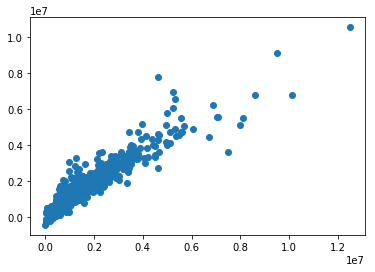

In [337]:
#predictions 

y_pred=lm.predict(X_test)

#visualize predictions

plt.scatter(y_test,y_pred)


The predicted values are less dispersed from the actual values of the response variable  

In [338]:
# R_squared : coeficient of determination 
#the percentage of explaned varaiance of the response varibles 
lm.score(X_test,y_test)

0.87835825122863631

In [339]:
lm.score(X_train,y_train)

0.82229300296341379

We have got a better coefficient of determination with the addition of the new varaibles.